# RISHIK REDDY BANDI
# B4
# 220968300

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score

In [3]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.drop(columns=["Id"],inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: ylabel='Count'>

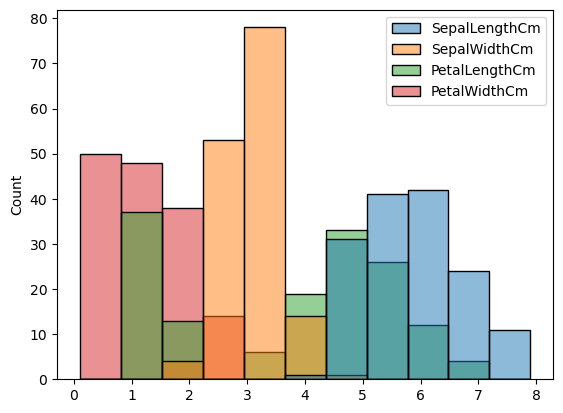

In [8]:
sns.histplot(data=df)

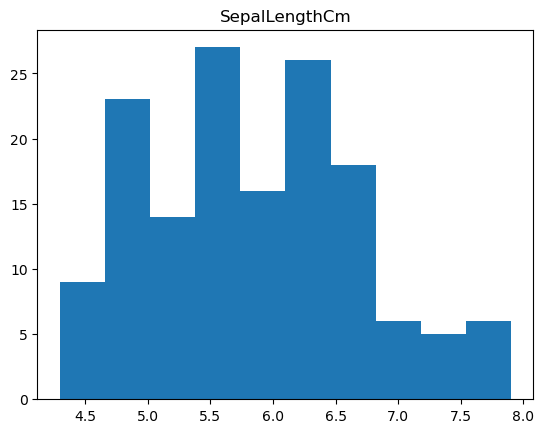

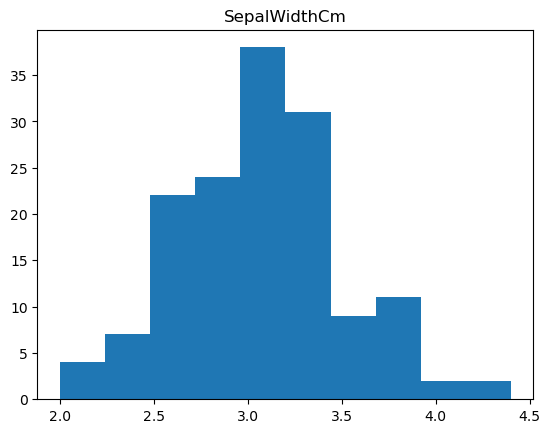

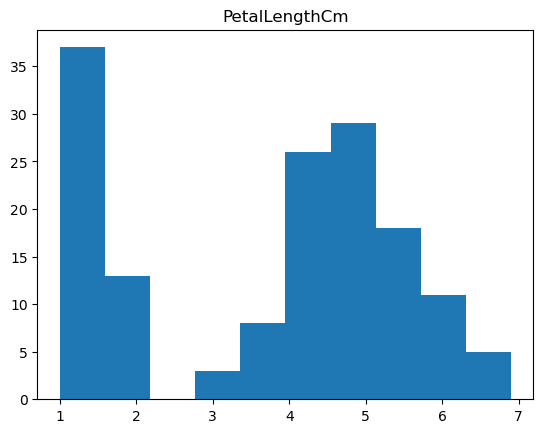

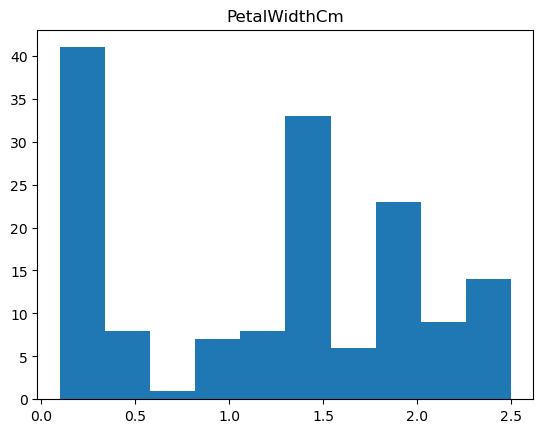

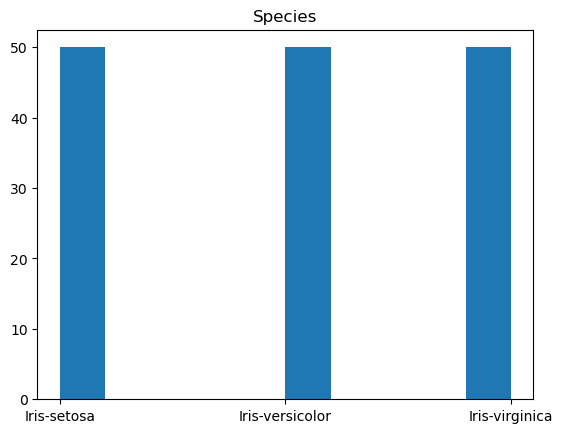

In [7]:
for column in df.columns:
    plt.title(column)
    plt.hist(x=df[column])
    plt.show()

In [14]:
df["Species"]=df["Species"].map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

In [15]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

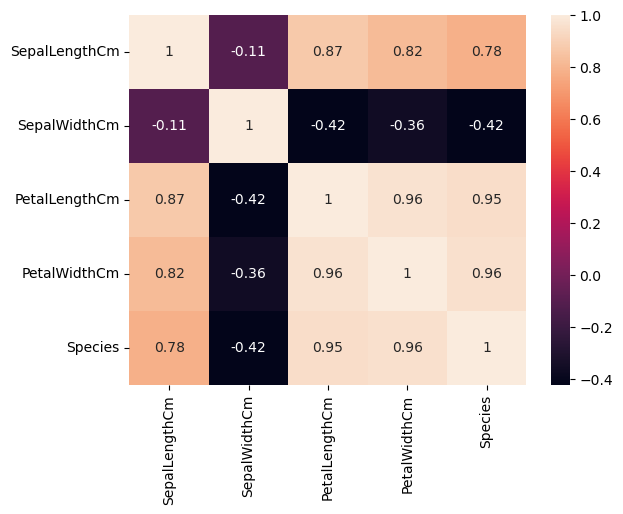

In [16]:
sns.heatmap(data=df.corr(),annot=True)

In [20]:
features=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]
target=df['Species']

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

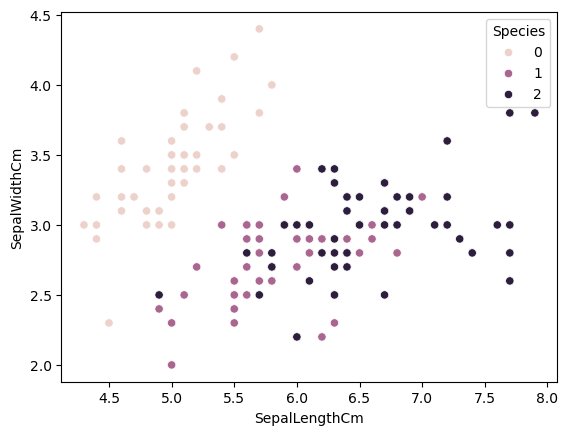

In [22]:
sns.scatterplot(x=features["SepalLengthCm"],y=features["SepalWidthCm"],hue=target)

# KNN with K=3

In [27]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.3,random_state=42)

In [29]:
def scaling(df):
    scaler=MinMaxScaler()
    for col in df.columns:
        df[col]=scaler.fit_transform(df[col].values.reshape(-1,1))
    return df

x_train=scaling(x_train)
x_test=scaling(x_test)

In [30]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
y_pred=KNN.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0,
       0, 1, 1, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2], dtype=int64)

In [33]:
accuracy_3=accuracy_score(y_test,y_pred)
precision_3=precision_score(y_test,y_pred,average=None)
f1_3=f1_score(y_test,y_pred,average=None)
recall_3=recall_score(y_test,y_pred,average=None)
print("accuracy is",accuracy_3)
print("precision is",precision_3)
print("f1 is",f1_3)
print("recall is",recall_3)

accuracy is 0.9523809523809523
precision is [1.         0.91176471 0.93548387]
f1 is [1.         0.92537313 0.92063492]
recall is [1.         0.93939394 0.90625   ]


In [34]:
Y_pred=KNN.predict(x_train)
Train_set_accuracy=accuracy_score(y_train,Y_pred)
Train_set_accuracy

0.975

<Axes: >

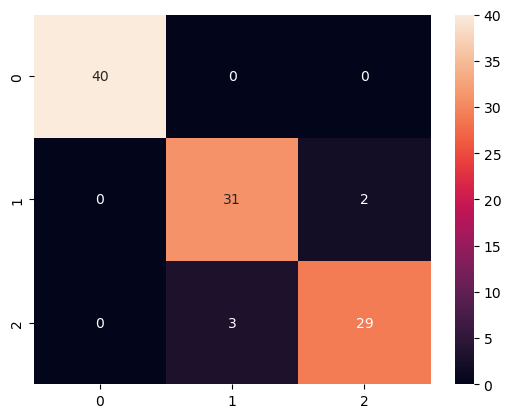

In [34]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.91      0.94      0.93        33
           2       0.94      0.91      0.92        32

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105



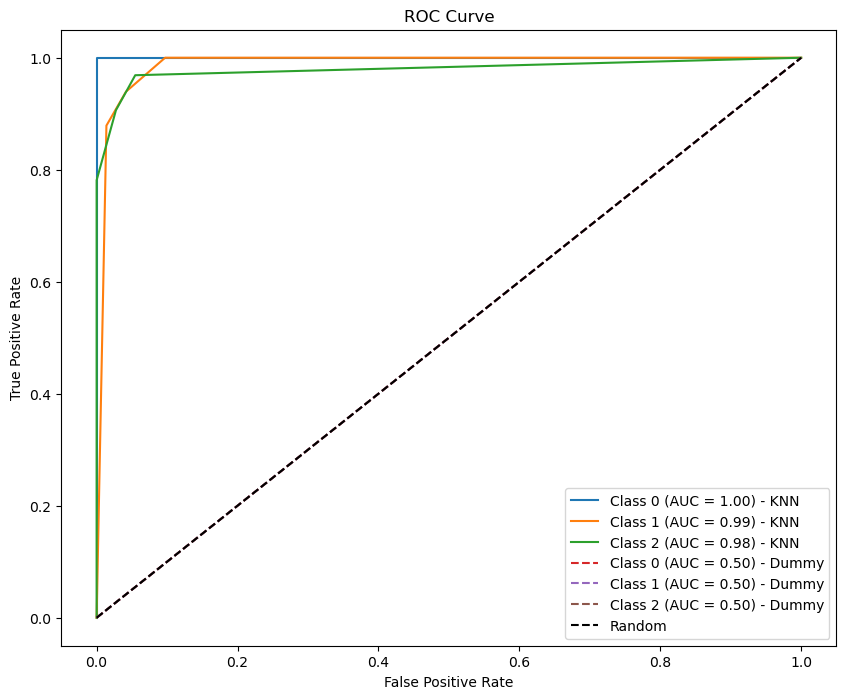

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.dummy import DummyClassifier

y_test_bin = label_binarize(y_test, classes=range(3))

y_scores = KNN.predict_proba(x_test)

fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()

for i in range(3):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(x_train, y_train)
y_scores_dummy = clf.predict_proba(x_test)

fpr_dummy = dict()
tpr_dummy = dict()
roc_auc_dummy = dict()

for i in range(3):
    fpr_dummy[i], tpr_dummy[i], _ = roc_curve(y_test_bin[:, i], y_scores_dummy[:, i])
    roc_auc_dummy[i] = auc(fpr_dummy[i], tpr_dummy[i])

plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(fpr_knn[i], tpr_knn[i], label=f'Class {i} (AUC = {roc_auc_knn[i]:.2f}) - KNN')

for i in range(3):
    plt.plot(fpr_dummy[i], tpr_dummy[i], linestyle='--', label=f'Class {i} (AUC = {roc_auc_dummy[i]:.2f}) - Dummy')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [42]:
from sklearn.model_selection import KFold,cross_val_score

In [44]:
kfold=KFold(n_splits=10,shuffle=True,random_state=5)
accuracy=cross_val_score(KNN,features,target,cv=kfold,scoring='accuracy')
precision=cross_val_score(KNN,features,target,cv=kfold,scoring='precision_macro')
f1=cross_val_score(KNN,features,target,cv=kfold,scoring='f1_macro')
recall=cross_val_score(KNN,features,target,cv=kfold,scoring='recall_macro')
results = []
for i in range(10):
    results.append([i+1, accuracy[i], precision[i], f1[i], recall[i]])
kfold_results = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'F1 Score', 'Recall'])
kfold_results

,Fold,Accuracy,Precision,F1 Score,Recall
0,1,0.866667,0.877778,0.877778,0.877778
1,2,0.933333,0.944444,0.939394,0.944444
2,3,1.000000,1.000000,1.000000,1.000000
3,4,1.000000,1.000000,1.000000,1.000000
4,5,1.000000,1.000000,1.000000,1.000000
5,6,1.000000,1.000000,1.000000,1.000000
6,7,0.933333,0.952381,0.926740,0.916667
7,8,0.933333,0.944444,0.922078,0.916667
8,9,0.933333,0.888889,0.911111,0.958333
9,10,1.000000,1.000000,1.000000,1.000000


In [45]:
kfold_results.iloc[:,1:5].mean()

Accuracy     0.960000
Precision    0.960794
F1 Score     0.957710
Recall       0.961389
dtype: float64

# KNN FOR DIFFERENT K  VALUES

In [46]:
from tabulate import tabulate

In [51]:
neighbours = [3, 4, 5, 6, 7, 8, 9]
train_size = [0.75, 0.70, 0.80]
accuracy = {}
precision = {}
f1 = {}
recall = {}

def KNN(neighbours, train_size, features, target):
    results = []

    for k in neighbours:
        for i in train_size:
            x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=i, random_state=5)
            x_train = scaling(x_train)
            x_test = scaling(x_test)
            KNN = KNeighborsClassifier(n_neighbors=k)
            KNN.fit(x_train, y_train)
            y_pred = KNN.predict(x_test)
            accuracy[k] = accuracy_score(y_test, y_pred)
            precision[k] = precision_score(y_test, y_pred,average='macro')
            f1[k] = f1_score(y_test, y_pred,average='macro')
            recall[k] = recall_score(y_test, y_pred,average='macro')
            results.append([k, i, accuracy[k], precision[k], f1[k], recall[k]])

    headers = ["K", "Train Size", "Accuracy", "Precision", "F1 Score", "Recall"]
    print(tabulate(results, headers=headers, tablefmt="grid"))

KNN(neighbours, train_size, features, target)

+-----+--------------+------------+-------------+------------+----------+
|   K |   Train Size |   Accuracy |   Precision |   F1 Score |   Recall |
+=====+==============+============+=============+============+==========+
|   3 |         0.75 |   1        |    1        |   1        | 1        |
+-----+--------------+------------+-------------+------------+----------+
|   3 |         0.7  |   1        |    1        |   1        | 1        |
+-----+--------------+------------+-------------+------------+----------+
|   3 |         0.8  |   0.966667 |    0.972222 |   0.969634 | 0.969697 |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.75 |   0.973684 |    0.977778 |   0.974013 | 0.972222 |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.7  |   0.977778 |    0.980392 |   0.977553 | 0.97619  |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.8  |   0.933333 |   

# WITHOUT  USING BUILT-IN FUNCTIONS

In [59]:
def euclidist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [60]:
X=df.iloc[:,:-1]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [61]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [62]:
x_train=X.iloc[:int(X.shape[0]*.7),:]
x_test=X.iloc[int(X.shape[0]*.7):,:]
y_train=y.iloc[:int(y.shape[0]*.7)]
y_test=y.iloc[int(y.shape[0]*.7):]

In [63]:
def Knn(x_train,y_train,x_test,k):
    y_pred=[]
    for i in range(x_test.shape[0]):
        class_0=0
        class_1=0
        class_2=0
        dist=[]
        for j in range(x_train.shape[0]):
            d=euclidist(x_test.iloc[i],x_train.iloc[j])
            dist.append([d,y_train.iloc[j]])#for each distance and label(class of it)
        dist=sorted(dist)
        dist=dist[:k]#getting only k nearest neighbours
        for i in range(len(dist)):
            if(dist[i][1]==0):
                class_0+=1
            elif(dist[i][1]==1):
                class_1+=1
            else:
                class_2+=1
        if(class_0>class_1 and class_0>class_2):
            y_pred.append(0)
        elif(class_1>class_0 and class_1>class_2):
            y_pred.append(1)
        else:
            y_pred.append(2)
    return y_pred

In [64]:
y_pred=Knn(x_train,y_train,x_test,3)
y_pred

[2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1]

In [65]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("accuracy is",accuracy)
print("precision is",precision)
print("f1 is",f1)
print("recall is",recall)

accuracy is 0.6222222222222222
precision is 0.0
f1 is 0.0
recall is 0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

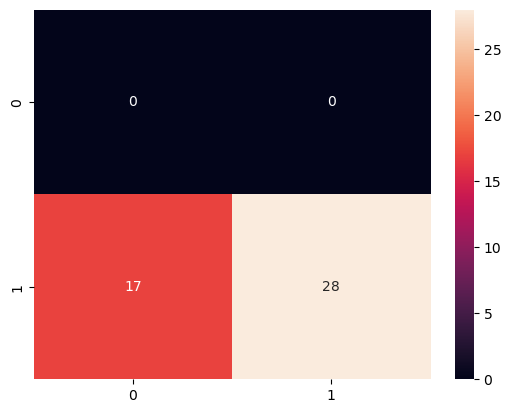

In [66]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)